# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [20]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

!python -m pip install jupyter-console==6.6.3 jupyter-client>=7.0.0 ipykernel>=6.14 prompt-toolkit>=3.0.30 --no-cache --upgrade --force-reinstall


zsh:1: 7.0.0 not found


### Important: Restart the Kernel at this moment

In [1]:
# Restart the Kernel before you execute this command.
# Install requirements
!python -m pip install -r requirements.txt

  Using cached opencv-python-headless-4.5.3.56.tar.gz (89.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached matplotlib-3.4.3-cp310-cp310-macosx_11_0_arm64.whl
  Using cached numpy-1.21.2-cp310-cp310-macosx_13_0_arm64.whl
  Using cached Pillow-7.0.0-cp310-cp310-macosx_11_0_arm64.whl
  Using cached bokeh-2.1.1-py3-none-any.whl
  Using cached torch-1.11.0-cp310-none-macosx_11_0_arm64.whl (43.1 MB)
  Using cached torchvision-0.12.0-cp310-cp310-macosx_11_0_arm64.whl (1.2 MB)
  Using cached tqdm-4.63.0-py2.py3-none-any.whl (76 kB)
  Using cached ipywidgets-7.7.0-py2.py3-none-any.whl (123 kB)
  Using cached livelossplot-0.5.4-py3-none-any.whl (22 kB)
  Using cached pytest-7.1.1-py3-none-any.whl (297 kB)
  Using cached pandas-1.3.5-cp310-cp310-macosx_11_0_arm64.whl (10.3 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
 

  Using cached jupyter_console-6.6.2-py3-none-any.whl (24 kB)
  Using cached jupyter_console-6.6.1-py3-none-any.whl (24 kB)
  Using cached jupyter_console-6.6.0-py3-none-any.whl (24 kB)
  Using cached jupyter_console-6.5.1-py3-none-any.whl (23 kB)
  Using cached jupyter_console-6.5.0-py3-none-any.whl (23 kB)
  Using cached jupyter_console-6.4.4-py3-none-any.whl (22 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for opencv-python-headless (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [3027 lines of output]
      
      
      --------------------------------------------------------------------------------
      -- Trying 'Ninja' generator
      --------------------------------
      ---------------------------
      ----------------------
      -----------------
      ------------
      -------
      --
      CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
        Compatibility with CMake < 3.10 will be removed from a future v

              cblas_sgemm(CblasRowMajor, transA, transB, a_m, d_n, a_n, (float)alpha, (float*)src1, ldsrc1, (float*)src2, ldsrc2, (float)beta, (float*)dst, lddst);
              ^
      /Library/Developer/CommandLineTools/SDKs/MacOSX13.3.sdk/System/Library/Frameworks/vecLib.framework/Headers/cblas.h:608:6: note: 'cblas_sgemm' has been explicitly marked deprecated here
      void cblas_sgemm(const enum CBLAS_ORDER __Order,
           ^
      /private/var/folders/pq/zh2dnbvx5dg8388gk2q506m80000gn/T/pip-install-40zg4ge9/opencv-python-headless_253217d3d53a4f978e4c2460af18befe/opencv/modules/core/src/hal_internal.cpp:429:9: warning: 'cblas_dgemm' is deprecated: first deprecated in macOS 13.3 - An updated CBLAS interface supporting ILP64 is available.  Please compile with -DACCELERATE_NEW_LAPACK to access the new headers and -DACCELERATE_LAPACK_ILP64 for ILP64 support. [-Wdeprecated-declarations]
              cblas_dgemm(CblasRowMajor, transA, transB, a_m, d_n, a_n, (double)alpha, (double*)

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

/Users/nawafalzuwaymil/anaconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/nawafalzuwaymil/anaconda3/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <EA7F9DF5-8854-31D8-89D4-BD566CAF4DEA> /Users/nawafalzuwaymil/anaconda3/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <CDAC6E34-8608-3E70-8B2F-32BCD38E90FB> /Users/nawafalzuwaymil/anaconda3/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [11]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training and test set
training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)

# Define training and test dataloader
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

The preprocessing steps are standard in deep learning pipelines because they improve model performance, and the following is why we need to preprocess:

**Transform To Tensors:** We need to convert the input image into a PyTorch tensor. Because PyTorch models work with tensors, this conversion is necessary for compatibility. Also scales the pixel values from the range 0 - 255 into 0 - 1 to accelerate and stabilize the training process 

**Normalization:** It is better to normalize the tensor to scale the pixel values to the range between -1 and 1, which is often useful for neural network training

**Data Loader:** This is a PyTorch utility that helps in loading data in batches, shuffling, and parallelizing data loading.

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [12]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

3


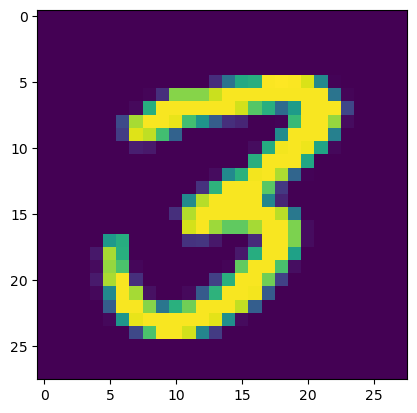

8


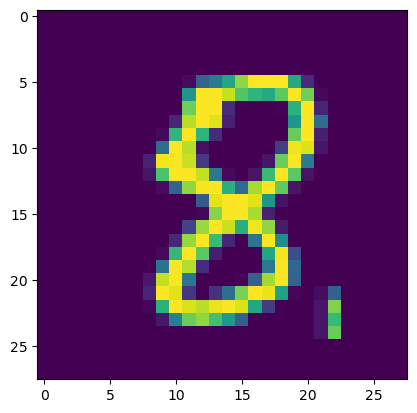

8


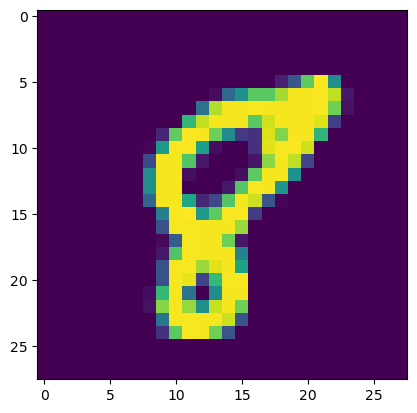

3


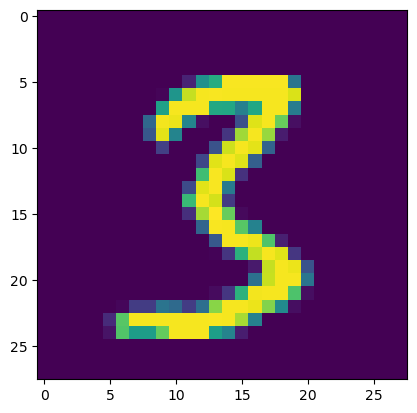

8


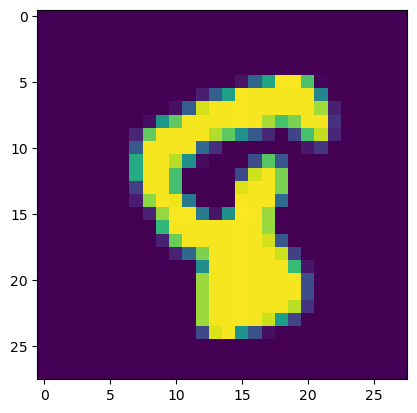

In [13]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [22]:
## YOUR CODE HERE ##

# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [ ]:
## YOUR CODE HERE ##
net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

Epoch 1 training accuracy: 0.88% training loss: 0.40017
Epoch 1 validation accuracy: 0.93% validation loss: 0.23401
Epoch 2 training accuracy: 0.94% training loss: 0.18798
Epoch 2 validation accuracy: 0.95% validation loss: 0.15860
Epoch 3 training accuracy: 0.96% training loss: 0.13737
Epoch 3 validation accuracy: 0.96% validation loss: 0.13258
Epoch 4 training accuracy: 0.96% training loss: 0.11443
Epoch 4 validation accuracy: 0.96% validation loss: 0.11724


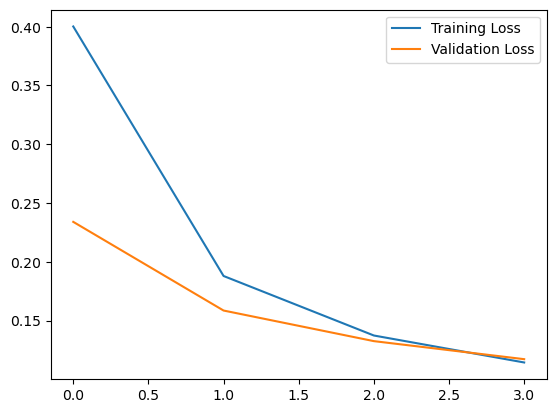

Test Accuracy: 96.14%


In [ ]:
## YOUR CODE HERE ##

num_epochs = 4

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).float().mean().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).float().mean().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))
    
    
net.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

# Print results
print(f'Test Accuracy: {accuracy :.2f}%')

## Saving your model
Using `torch.save`, save your model for future loading.

In [26]:
## YOUR CODE HERE ##

model_path = 'model.pth'
torch.save(net.state_dict(), model_path)